<a href="https://colab.research.google.com/github/elizaveta-alx/admanced_ml/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instal libraries

In [1]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [1]:
!nvidia-smi

Thu Oct 13 14:01:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
!pip install piq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 23.7 MB/s 


In [4]:
!git clone https://github.com/aigagror/ML-Aesthetics-NIMA.git nima

Cloning into 'nima'...
remote: Enumerating objects: 423, done.
remote: Total 423 (delta 0), reused 0 (delta 0), pack-reused 423
Receiving objects: 100% (423/423), 55.90 MiB | 33.18 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [15]:
from collections import OrderedDict
from operator import itemgetter    
from numpy import sort
import os
import torch
import piq
from skimage.io import imread
from main import rate

#Read and sort images

In [26]:
files = os.listdir("./pictures")

def sort_picture_by_rating(files):
    images_dict = {}
    #files = sort(files)
    for f in files:
        name_and_rating = f.split("_")
        images_dict[f]=int(name_and_rating[1].split(".")[0])
    images_dict_sort = dict(sorted(images_dict.items(), key = itemgetter(1), reverse = False))
    return images_dict_sort

images = sort_picture_by_rating(files)
images

{'9_1.jfif': 1,
 '15_1.jfif': 1,
 '8_2.jpg': 2,
 '6_2.jfif': 2,
 '19_3.jpg': 3,
 '5_3.jpg': 3,
 '18_3.jpg': 3,
 '13_3.jpg': 3,
 '3_4.jpg': 4,
 '4_4.jpg': 4,
 '10_4.jpg': 4,
 '14_4.jpeg': 4,
 '20_4.jpg': 4,
 '17_4.jpg': 4,
 '7_5.jpg': 5,
 '2_5.jpg': 5,
 '12_5.jpg': 5,
 '1_5.jpg': 5,
 '11_5.jpg': 5,
 '16_5.jpg': 5}

In [27]:
len(images)

20

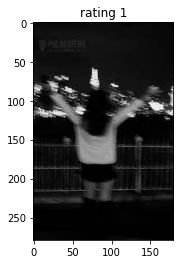

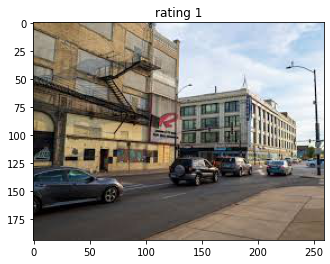

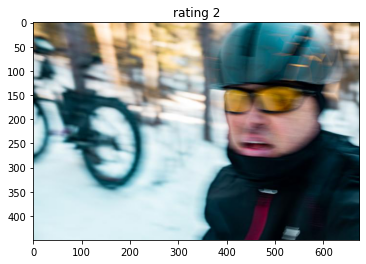

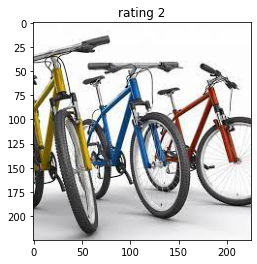

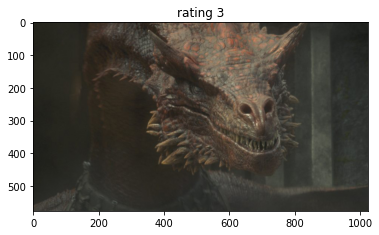

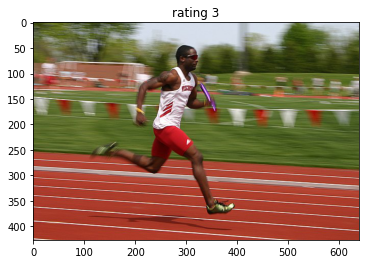

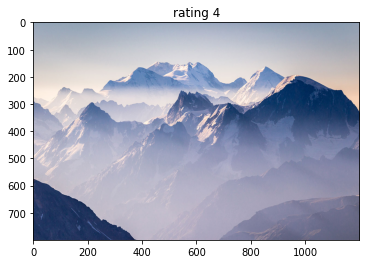

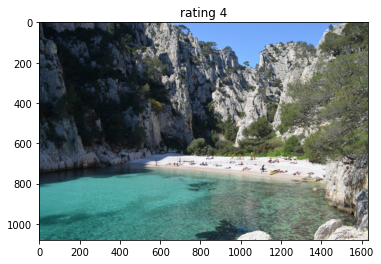

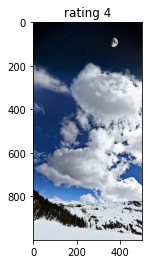

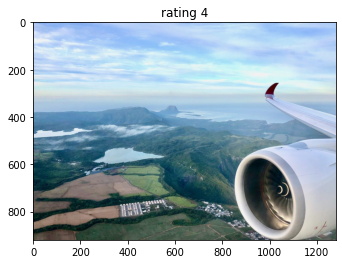

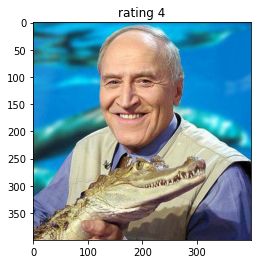

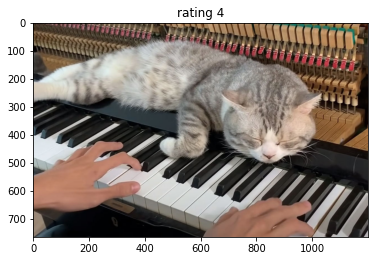

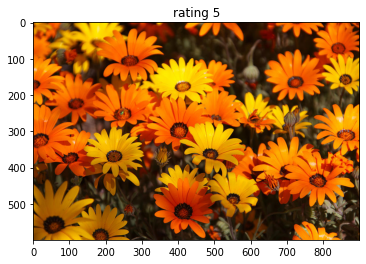

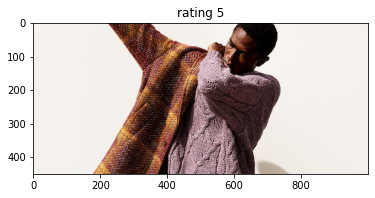

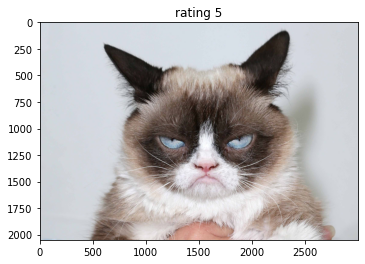

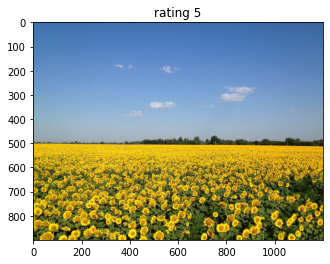

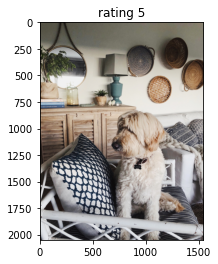

In [28]:
import numpy as np
from matplotlib import image as mpimg, pyplot as plt
%matplotlib inline

for img, qa in images.items():
    img1 = mpimg.imread("./pictures/" + img)
    plt.title("rating {}".format(qa))
    plt.imshow(img1)
    plt.show()

#Compute TV, BRISQUE and NIMA metrics

In [29]:
def metrics(path, label):
     # Read RGB image and it's noisy version
    x = torch.tensor(imread(path)).permute(2, 0, 1)[None, ...] / 255.
    # Compute TV
    tv_index: torch.Tensor = piq.total_variation(x)
    # Compute BRISQUE score
    brisque_index: torch.Tensor = piq.brisque(x, data_range=1., reduction='none')
    # Compute NIMA
    scores, mean, std = rate(path)

    metrics = {"image_name":path.split("/")[-1],
               "human_perception":label,
               "TV": tv_index.item(),
               "BRISQUE":brisque_index.item(),
               "NIMA_mean": mean,
               "NIMA_std": std}
    return metrics

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


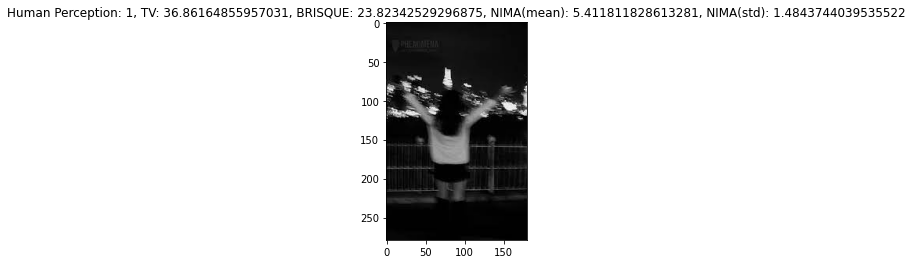

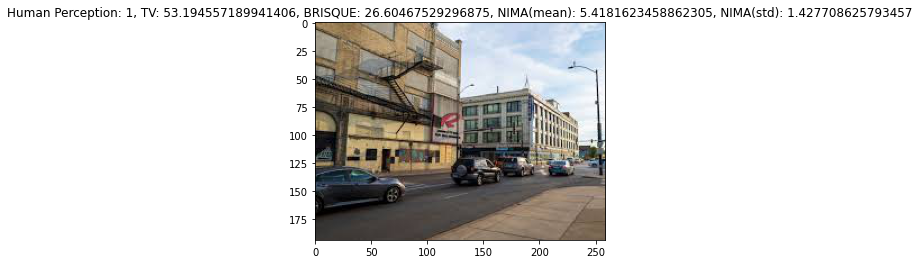

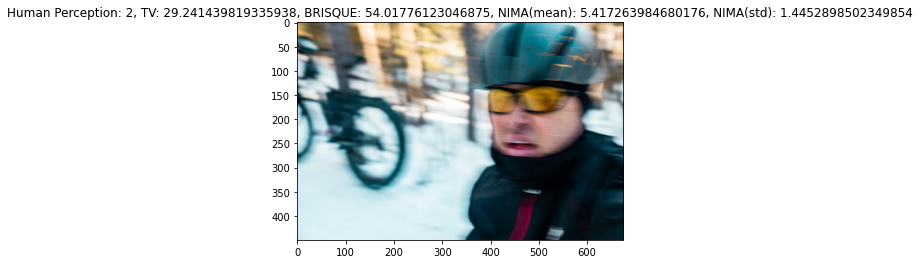

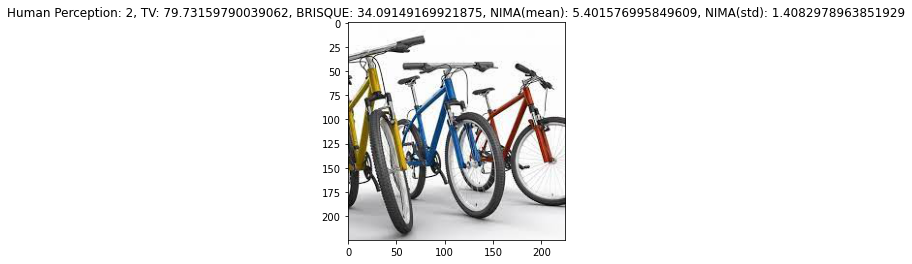

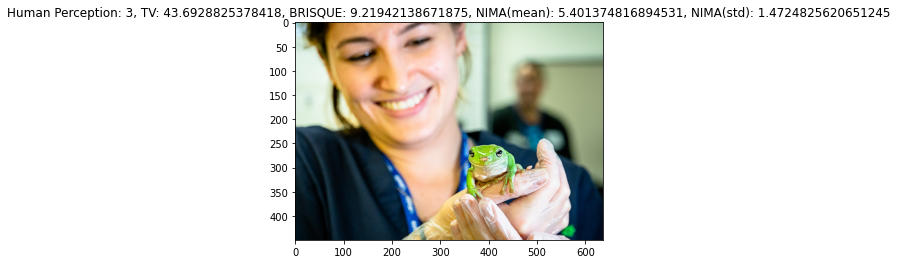

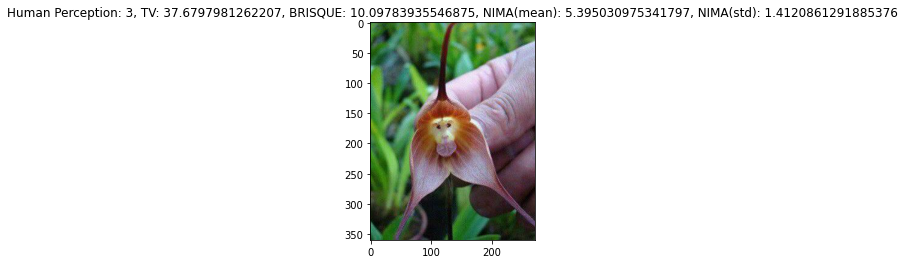

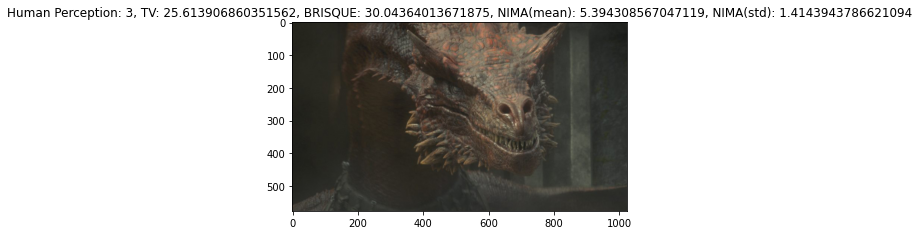

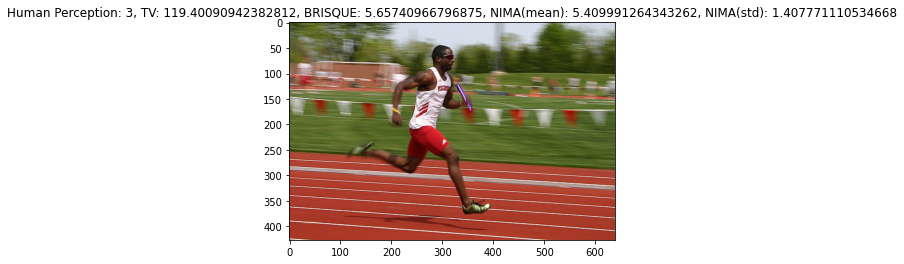

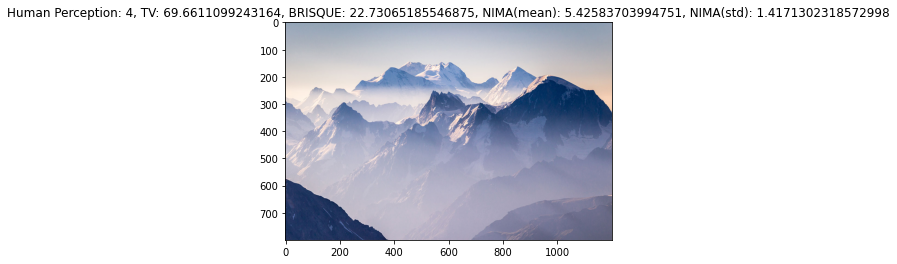

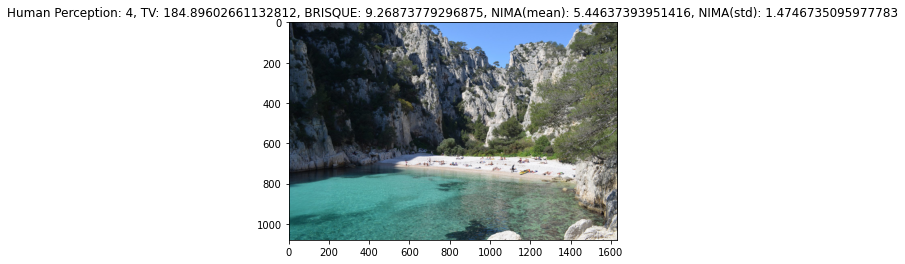

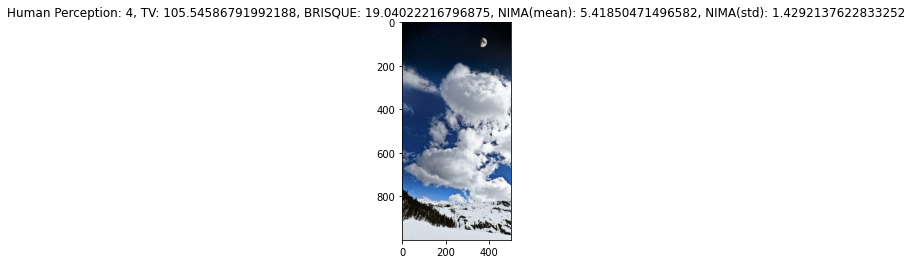

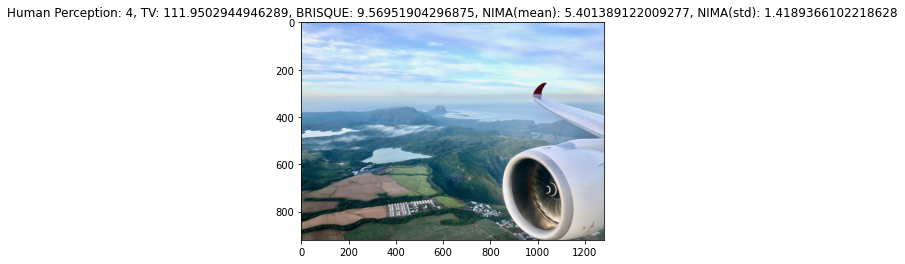

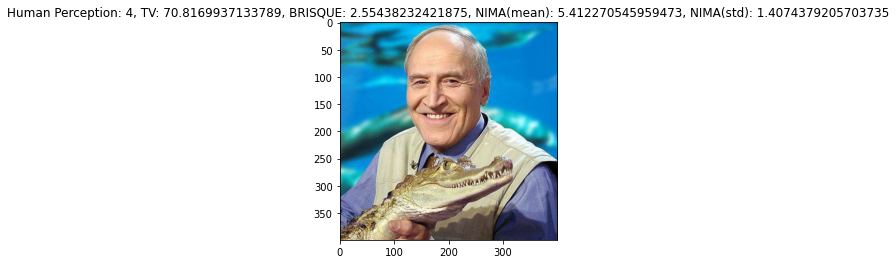

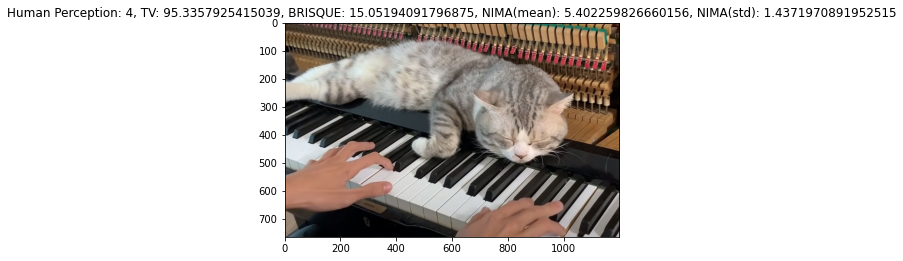

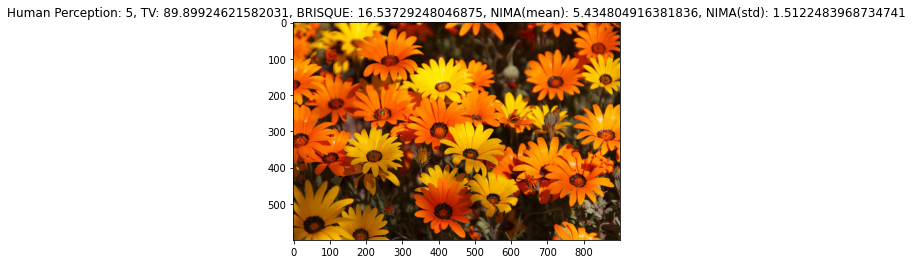

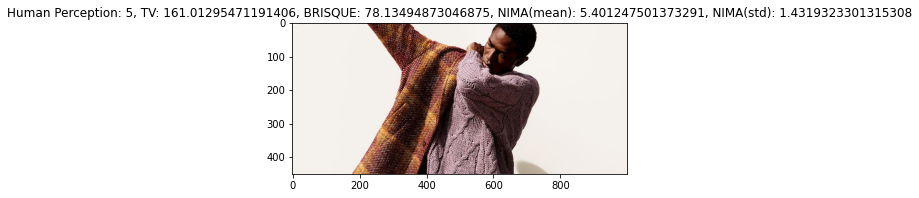

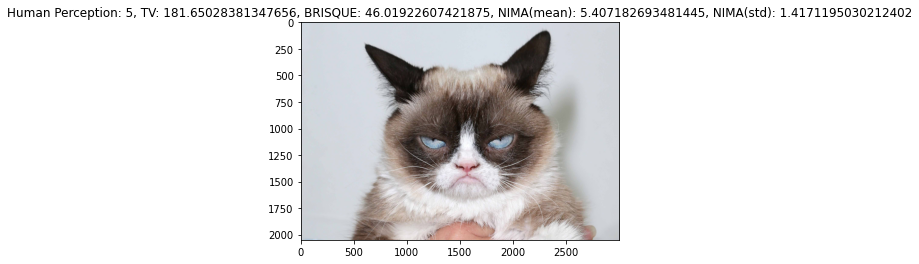

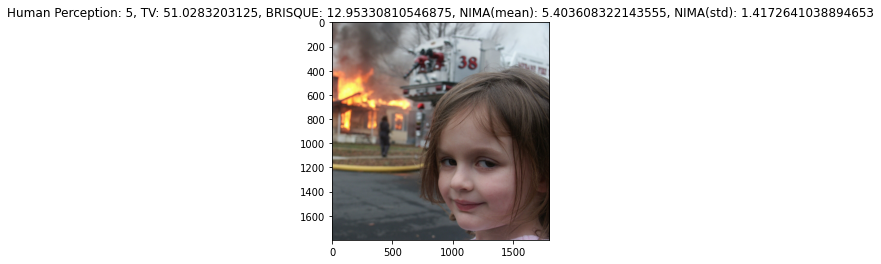

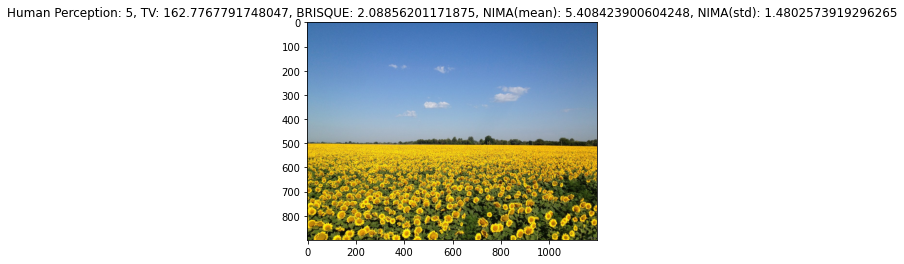

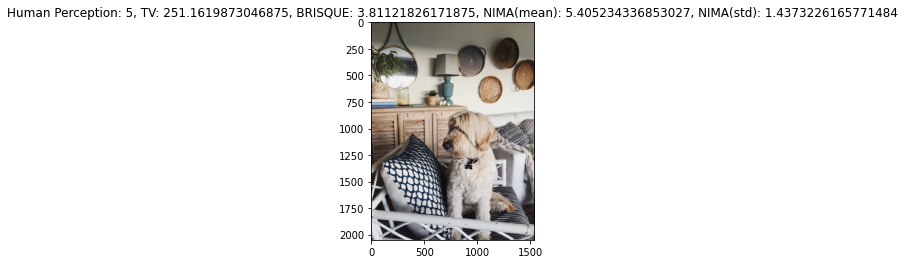

In [37]:
ignored = 0
results = []

for img, rating in images.items():
    path = "./pictures/"+img
    try:
      d = metrics(path, rating)
      results.append(d)
    except:
        print("ignoring: ", path)
        ignored += 1
        continue
    img2 = mpimg.imread(path)
    plt.title(f"Human Perception: {rating}, TV: {d['TV']}, BRISQUE: {d['BRISQUE']}, NIMA(mean): {d['NIMA_mean']}, NIMA(std): {d['NIMA_std']}")
    plt.imshow(img2)
    plt.show()
    

#Pearson correlation coefficients 

In [35]:
import pandas as pd
correlation = pd.DataFrame(results).corr()
correlation

human_perception        TV   BRISQUE  NIMA_mean  NIMA_std
human_perception          1.000000  0.623796 -0.104190   0.057521  0.061690
TV                        0.623796  1.000000 -0.047837   0.179292  0.098752
BRISQUE                  -0.104190 -0.047837  1.000000  -0.111067 -0.126336
NIMA_mean                 0.057521  0.179292 -0.111067   1.000000  0.499495
NIMA_std                  0.061690  0.098752 -0.126336   0.499495  1.000000

#Conclusion

TV has the highest correlation value with human perceprion